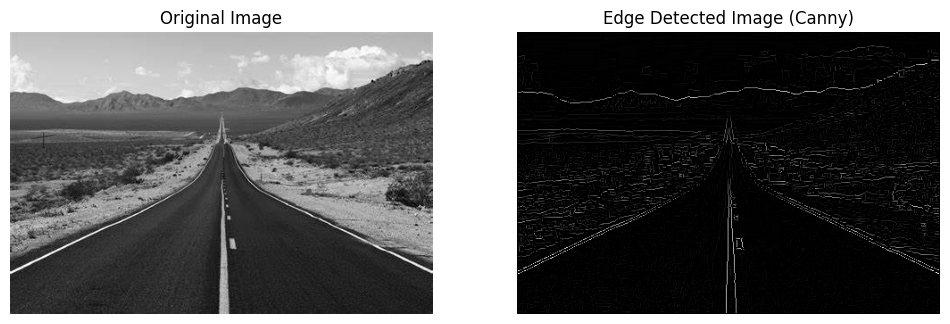

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\OIP (2).jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Smoothing: Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# 2. Gradient Calculation: Calculate gradients in the x and y directions using Sobel filters
grad_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude and direction
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x) * 180 / np.pi
angle[angle < 0] += 180  # Ensure angles are between 0 and 180 degrees

# 3. Non-Maximum Suppression: Thin the edges by suppressing non-maximal gradients
def non_maximum_suppression(magnitude, angle):
    rows, cols = magnitude.shape
    suppressed = np.zeros_like(magnitude)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Get the angle and corresponding neighbors
            current_angle = angle[i, j]
            current_mag = magnitude[i, j]

            if (0 <= current_angle < 22.5) or (157.5 <= current_angle < 180):
                neighbor1 = magnitude[i, j + 1]
                neighbor2 = magnitude[i, j - 1]
            elif (22.5 <= current_angle < 67.5):
                neighbor1 = magnitude[i + 1, j - 1]
                neighbor2 = magnitude[i - 1, j + 1]
            elif (67.5 <= current_angle < 112.5):
                neighbor1 = magnitude[i + 1, j]
                neighbor2 = magnitude[i - 1, j]
            else:
                neighbor1 = magnitude[i - 1, j - 1]
                neighbor2 = magnitude[i + 1, j + 1]

            # Compare with neighbors and suppress if not local maxima
            if current_mag >= neighbor1 and current_mag >= neighbor2:
                suppressed[i, j] = current_mag
            else:
                suppressed[i, j] = 0

    return suppressed

# Apply non-maximum suppression
suppressed_edges = non_maximum_suppression(magnitude, angle)

# Normalize the result for visualization
normalized_edges = cv2.normalize(suppressed_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Plotting the original image and the edge-detected image
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(normalized_edges, cmap='gray')
plt.title("Edge Detected Image (Canny)")
plt.axis('off')

plt.show()


C:\Users\Dilfina\AppData\Local\Temp\ipykernel_10848\1374098508.py:41: RuntimeWarning: overflow encountered in scalar subtract
  if abs(current_intensity - neighbor_intensity) < threshold and region_mask[neighbor_x, neighbor_y] == 0:


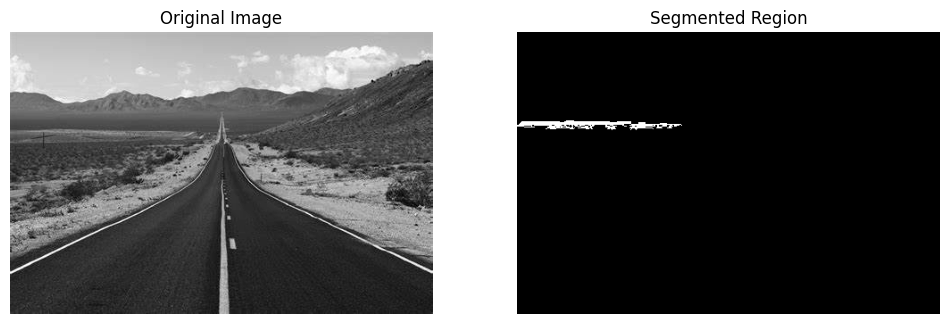

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\OIP (2).jpeg', cv2.IMREAD_GRAYSCALE)  # Read as grayscale

# Define region-growing parameters
seed_point = (100, 100)  # Manually defined seed point, this can be set interactively or automatically
threshold = 15  # Intensity threshold for growing the region
region_grown = np.zeros_like(image)  # Binary mask for the region

# Define a function for region growing
def region_growing(image, seed_point, threshold):
    # Initialize the region with the seed point
    region_mask = np.zeros_like(image)
    region_mask[seed_point] = 255  # Mark the seed point
    
    # Create a list to store the pixels to visit
    pixels_to_visit = [seed_point]
    
    # Get the size of the image
    rows, cols = image.shape
    
    # Start region growing process
    while pixels_to_visit:
        # Get the current pixel
        current_pixel = pixels_to_visit.pop(0)
        current_x, current_y = current_pixel
        
        # Check the intensity of the current pixel
        current_intensity = image[current_x, current_y]
        
        # Check 8-neighbors around the current pixel (including diagonals)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            neighbor_x, neighbor_y = current_x + dx, current_y + dy
            if 0 <= neighbor_x < rows and 0 <= neighbor_y < cols:
                neighbor_intensity = image[neighbor_x, neighbor_y]
                
                # If the neighbor is within the threshold, add to the region
                if abs(current_intensity - neighbor_intensity) < threshold and region_mask[neighbor_x, neighbor_y] == 0:
                    region_mask[neighbor_x, neighbor_y] = 255
                    pixels_to_visit.append((neighbor_x, neighbor_y))
    
    return region_mask

# Perform region growing segmentation
segmented_region = region_growing(image, seed_point, threshold)

# Visualize the original and segmented region
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_region, cmap='gray')
plt.title("Segmented Region")
plt.axis('off')

plt.show()
